In [1]:
!rm -rf /content/drive/*
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import os

dataset_path = "/content/drive/MyDrive/pomeyolo/Pomegranate Diseases Dataset"  # change to your path
image_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".gif"]  # add other formats if needed

image_count = 0
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_count += 1

print("Total images:", image_count)

Total images: 5099


In [3]:
import os

target_root = "/content/drive/MyDrive/pomeyolo/pome_yolo/images"

for split in ['train', 'val', 'test']:
    split_dir = os.path.join(target_root, split)
    count = len([f for f in os.listdir(split_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    print(f"{split.capitalize()} set: {count} images")

Train set: 4079 images
Val set: 509 images
Test set: 511 images


In [4]:
!pip install ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00


In [5]:
!pip install ultralytics opencv-python pillow


In [6]:
yaml_content = """
train: /content/drive/MyDrive/pomeyolo/pome_yolo/images/train
val: /content/drive/MyDrive/pomeyolo/pome_yolo/images/val
test: /content/drive/MyDrive/pomeyolo/pome_yolo/images/test

nc: 5
names: ["Alternaria", "Anthracnose", "Bacterial_Blight", "Cercospora", "Healthy"]
"""

# Save the yaml file to a temporary directory as a workaround for permission issues
temp_yaml_path = "/tmp/pome.yaml"
with open(temp_yaml_path, "w") as f:
    f.write(yaml_content)

print(f"YAML file saved to: {temp_yaml_path}")

YAML file saved to: /tmp/pome.yaml


In [ ]:
from ultralytics import YOLO

# Path to the last checkpoint saved by YOLO
checkpoint_path = '/content/drive/MyDrive/pomeyolo/results_y12s/weights/last.pt'

# Load the checkpoint
model = YOLO(checkpoint_path)

# Resume training from where it stopped
model.train(
    data='/tmp/pome.yaml',      # your dataset YAML
    epochs=100,                 # total epochs (YOLO continues from previous)
    imgsz=416,
    batch=8,
    device=0,                   # use GPU
    project='/content/drive/MyDrive/pomeyolo',
    name='results_y12s',
    resume=True                 # <-- key to continue from last.pt
)


Ultralytics 8.3.212 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/tmp/pome.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/pomeyolo/results_y12s/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=results_y12s, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

In [7]:
from ultralytics import YOLO

# Path to the last checkpoint saved by YOLO
checkpoint_path = '/content/drive/MyDrive/pomeyolo/results_y12s/weights/last.pt'

# Load the checkpoint
model = YOLO(checkpoint_path)

# Resume training from where it stopped
model.train(
    data='/tmp/pome.yaml',      # your dataset YAML
    epochs=100,                 # total epochs (YOLO continues from previous)
    imgsz=416,
    batch=8,
    device=0,                   # use GPU
    project='/content/drive/MyDrive/pomeyolo',
    name='results_y12s',
    resume=True                 # <-- key to continue from last.pt
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.213 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/tmp/pome.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, l

RuntimeError: Error(s) in loading state_dict for DetectionModel:
	While copying the parameter named "model.0.bn.running_mean", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.0.bn.running_var", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.1.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.1.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.2.cv1.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.2.cv1.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.2.cv2.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.2.cv2.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.2.m.0.cv1.bn.running_mean", whose dimensions in the model are torch.Size([16]) and whose dimensions in the checkpoint are torch.Size([16]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.2.m.0.cv1.bn.running_var", whose dimensions in the model are torch.Size([16]) and whose dimensions in the checkpoint are torch.Size([16]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.2.m.0.cv2.bn.running_mean", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.2.m.0.cv2.bn.running_var", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.3.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.3.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.4.cv1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.4.cv1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.4.cv2.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.4.cv2.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.4.m.0.cv1.bn.running_mean", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.4.m.0.cv1.bn.running_var", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.4.m.0.cv2.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.4.m.0.cv2.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.5.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.5.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.cv1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.cv1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.cv2.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.cv2.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.0.attn.qkv.bn.running_mean", whose dimensions in the model are torch.Size([384]) and whose dimensions in the checkpoint are torch.Size([384]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.0.attn.qkv.bn.running_var", whose dimensions in the model are torch.Size([384]) and whose dimensions in the checkpoint are torch.Size([384]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.0.attn.proj.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.0.attn.proj.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.0.attn.pe.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.0.attn.pe.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.0.mlp.0.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.0.mlp.0.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.0.mlp.1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.0.mlp.1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.1.attn.qkv.bn.running_mean", whose dimensions in the model are torch.Size([384]) and whose dimensions in the checkpoint are torch.Size([384]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.1.attn.qkv.bn.running_var", whose dimensions in the model are torch.Size([384]) and whose dimensions in the checkpoint are torch.Size([384]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.1.attn.proj.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.1.attn.proj.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.1.attn.pe.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.1.attn.pe.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.1.mlp.0.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.1.mlp.0.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.1.mlp.1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.0.1.mlp.1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.0.attn.qkv.bn.running_mean", whose dimensions in the model are torch.Size([384]) and whose dimensions in the checkpoint are torch.Size([384]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.0.attn.qkv.bn.running_var", whose dimensions in the model are torch.Size([384]) and whose dimensions in the checkpoint are torch.Size([384]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.0.attn.proj.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.0.attn.proj.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.0.attn.pe.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.0.attn.pe.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.0.mlp.0.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.0.mlp.0.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.0.mlp.1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.0.mlp.1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.1.attn.qkv.bn.running_mean", whose dimensions in the model are torch.Size([384]) and whose dimensions in the checkpoint are torch.Size([384]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.1.attn.qkv.bn.running_var", whose dimensions in the model are torch.Size([384]) and whose dimensions in the checkpoint are torch.Size([384]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.1.attn.proj.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.1.attn.proj.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.1.attn.pe.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.1.attn.pe.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.1.mlp.0.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.1.mlp.0.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.1.mlp.1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.6.m.1.1.mlp.1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.7.bn.running_mean", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.7.bn.running_var", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.cv1.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.cv1.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.cv2.bn.running_mean", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.cv2.bn.running_var", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.0.attn.qkv.bn.running_mean", whose dimensions in the model are torch.Size([768]) and whose dimensions in the checkpoint are torch.Size([768]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.0.attn.qkv.bn.running_var", whose dimensions in the model are torch.Size([768]) and whose dimensions in the checkpoint are torch.Size([768]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.0.attn.proj.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.0.attn.proj.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.0.attn.pe.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.0.attn.pe.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.0.mlp.0.bn.running_mean", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.0.mlp.0.bn.running_var", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.0.mlp.1.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.0.mlp.1.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.1.attn.qkv.bn.running_mean", whose dimensions in the model are torch.Size([768]) and whose dimensions in the checkpoint are torch.Size([768]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.1.attn.qkv.bn.running_var", whose dimensions in the model are torch.Size([768]) and whose dimensions in the checkpoint are torch.Size([768]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.1.attn.proj.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.1.attn.proj.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.1.attn.pe.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.1.attn.pe.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.1.mlp.0.bn.running_mean", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.1.mlp.0.bn.running_var", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.1.mlp.1.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.0.1.mlp.1.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.0.attn.qkv.bn.running_mean", whose dimensions in the model are torch.Size([768]) and whose dimensions in the checkpoint are torch.Size([768]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.0.attn.qkv.bn.running_var", whose dimensions in the model are torch.Size([768]) and whose dimensions in the checkpoint are torch.Size([768]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.0.attn.proj.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.0.attn.proj.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.0.attn.pe.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.0.attn.pe.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.0.mlp.0.bn.running_mean", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.0.mlp.0.bn.running_var", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.0.mlp.1.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.0.mlp.1.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.1.attn.qkv.bn.running_mean", whose dimensions in the model are torch.Size([768]) and whose dimensions in the checkpoint are torch.Size([768]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.1.attn.qkv.bn.running_var", whose dimensions in the model are torch.Size([768]) and whose dimensions in the checkpoint are torch.Size([768]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.1.attn.proj.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.1.attn.proj.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.1.attn.pe.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.1.attn.pe.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.1.mlp.0.bn.running_mean", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.1.mlp.0.bn.running_var", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.1.mlp.1.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.8.m.1.1.mlp.1.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.cv1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.cv1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.cv2.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.cv2.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.cv1.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.cv1.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.cv2.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.cv2.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.cv3.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.cv3.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.m.0.cv1.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.m.0.cv1.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.m.0.cv2.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.m.0.cv2.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.m.1.cv1.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.m.1.cv1.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.m.1.cv2.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.11.m.0.m.1.cv2.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.cv1.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.cv1.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.cv2.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.cv2.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.cv1.bn.running_mean", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.cv1.bn.running_var", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.cv2.bn.running_mean", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.cv2.bn.running_var", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.cv3.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.cv3.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.m.0.cv1.bn.running_mean", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.m.0.cv1.bn.running_var", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.m.0.cv2.bn.running_mean", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.m.0.cv2.bn.running_var", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.m.1.cv1.bn.running_mean", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.m.1.cv1.bn.running_var", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.m.1.cv2.bn.running_mean", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.14.m.0.m.1.cv2.bn.running_var", whose dimensions in the model are torch.Size([32]) and whose dimensions in the checkpoint are torch.Size([32]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.15.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.15.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.cv1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.cv1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.cv2.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.cv2.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.cv1.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.cv1.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.cv2.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.cv2.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.cv3.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.cv3.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.m.0.cv1.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.m.0.cv1.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.m.0.cv2.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.m.0.cv2.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.m.1.cv1.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.m.1.cv1.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.m.1.cv2.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.17.m.0.m.1.cv2.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.18.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.18.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.cv1.bn.running_mean", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.cv1.bn.running_var", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.cv2.bn.running_mean", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.cv2.bn.running_var", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.cv1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.cv1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.cv2.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.cv2.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.cv3.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.cv3.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.m.0.cv1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.m.0.cv1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.m.0.cv2.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.m.0.cv2.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.m.1.cv1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.m.1.cv1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.m.1.cv2.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.20.m.0.m.1.cv2.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv2.0.0.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv2.0.0.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv2.0.1.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv2.0.1.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv2.1.0.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv2.1.0.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv2.1.1.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv2.1.1.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv2.2.0.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv2.2.0.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv2.2.1.bn.running_mean", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv2.2.1.bn.running_var", whose dimensions in the model are torch.Size([64]) and whose dimensions in the checkpoint are torch.Size([64]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.0.0.0.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.0.0.0.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.0.0.1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.0.0.1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.0.1.0.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.0.1.0.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.0.1.1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.0.1.1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.1.0.0.bn.running_mean", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.1.0.0.bn.running_var", whose dimensions in the model are torch.Size([256]) and whose dimensions in the checkpoint are torch.Size([256]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.1.0.1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.1.0.1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.1.1.0.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.1.1.0.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.1.1.1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.1.1.1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.2.0.0.bn.running_mean", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.2.0.0.bn.running_var", whose dimensions in the model are torch.Size([512]) and whose dimensions in the checkpoint are torch.Size([512]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.2.0.1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.2.0.1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.2.1.0.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.2.1.0.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.2.1.1.bn.running_mean", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).
	While copying the parameter named "model.21.cv3.2.1.1.bn.running_var", whose dimensions in the model are torch.Size([128]) and whose dimensions in the checkpoint are torch.Size([128]), an exception occurred : ('Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.',).

In [8]:
from ultralytics import YOLO

# Path to the last checkpoint saved by YOLO
checkpoint_path = '/content/drive/MyDrive/pomeyolo/results_y12s/weights/last.pt'

# Load the checkpoint
model = YOLO(checkpoint_path)

# Resume training from where it stopped
model.train(
    data='/tmp/pome.yaml',      # your dataset YAML
    epochs=100,                 # total epochs (YOLO continues from previous)
    imgsz=416,
    batch=8,
    device=0,                   # use GPU
    project='/content/drive/MyDrive/pomeyolo',
    name='results_y12s',
    resume=True                 # <-- key to continue from last.pt
)


Ultralytics 8.3.213 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/tmp/pome.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/pomeyolo/results_y12s/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=results_y12s, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d01b91fa3f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [9]:
from ultralytics import YOLO

# Load trained model
model = YOLO('/content/drive/MyDrive/pomeyolo/results_y12s/weights/best.pt') # Corrected path

# Run validation and get metrics
metrics = model.val(device=0)

# Print key performance metrics
print(f"Precision: {metrics.box.p.mean():.4f}")
print(f"Recall:    {metrics.box.r.mean():.4f}")
print(f"mAP50:     {metrics.box.map50:.4f}") # Corrected attribute access
print(f"mAP50-95:  {metrics.box.map:.4f}")   # Corrected attribute access

Ultralytics 8.3.213 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,232,815 parameters, 0 gradients, 21.2 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 327.0±181.7 MB/s, size: 906.9 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/1SX5sjRSb2KUnspAmKGge3WQwVqTJQ1wH/pome_yolo/labels/val.cache... 509 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 509/509 838.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 32/32 3.5it/s 9.1s
                   all        509        509       0.93      0.936      0.969      0.862
            Alternaria         86         86      0.954      0.964      0.978      0.869
           Anthracnose        118        118      0.919      0.932      0.976      0.862
      Bacterial_Blight         85         85      0.975      0.988      0.992      0.886
            Cercospora         72         72      0.929       0.91  

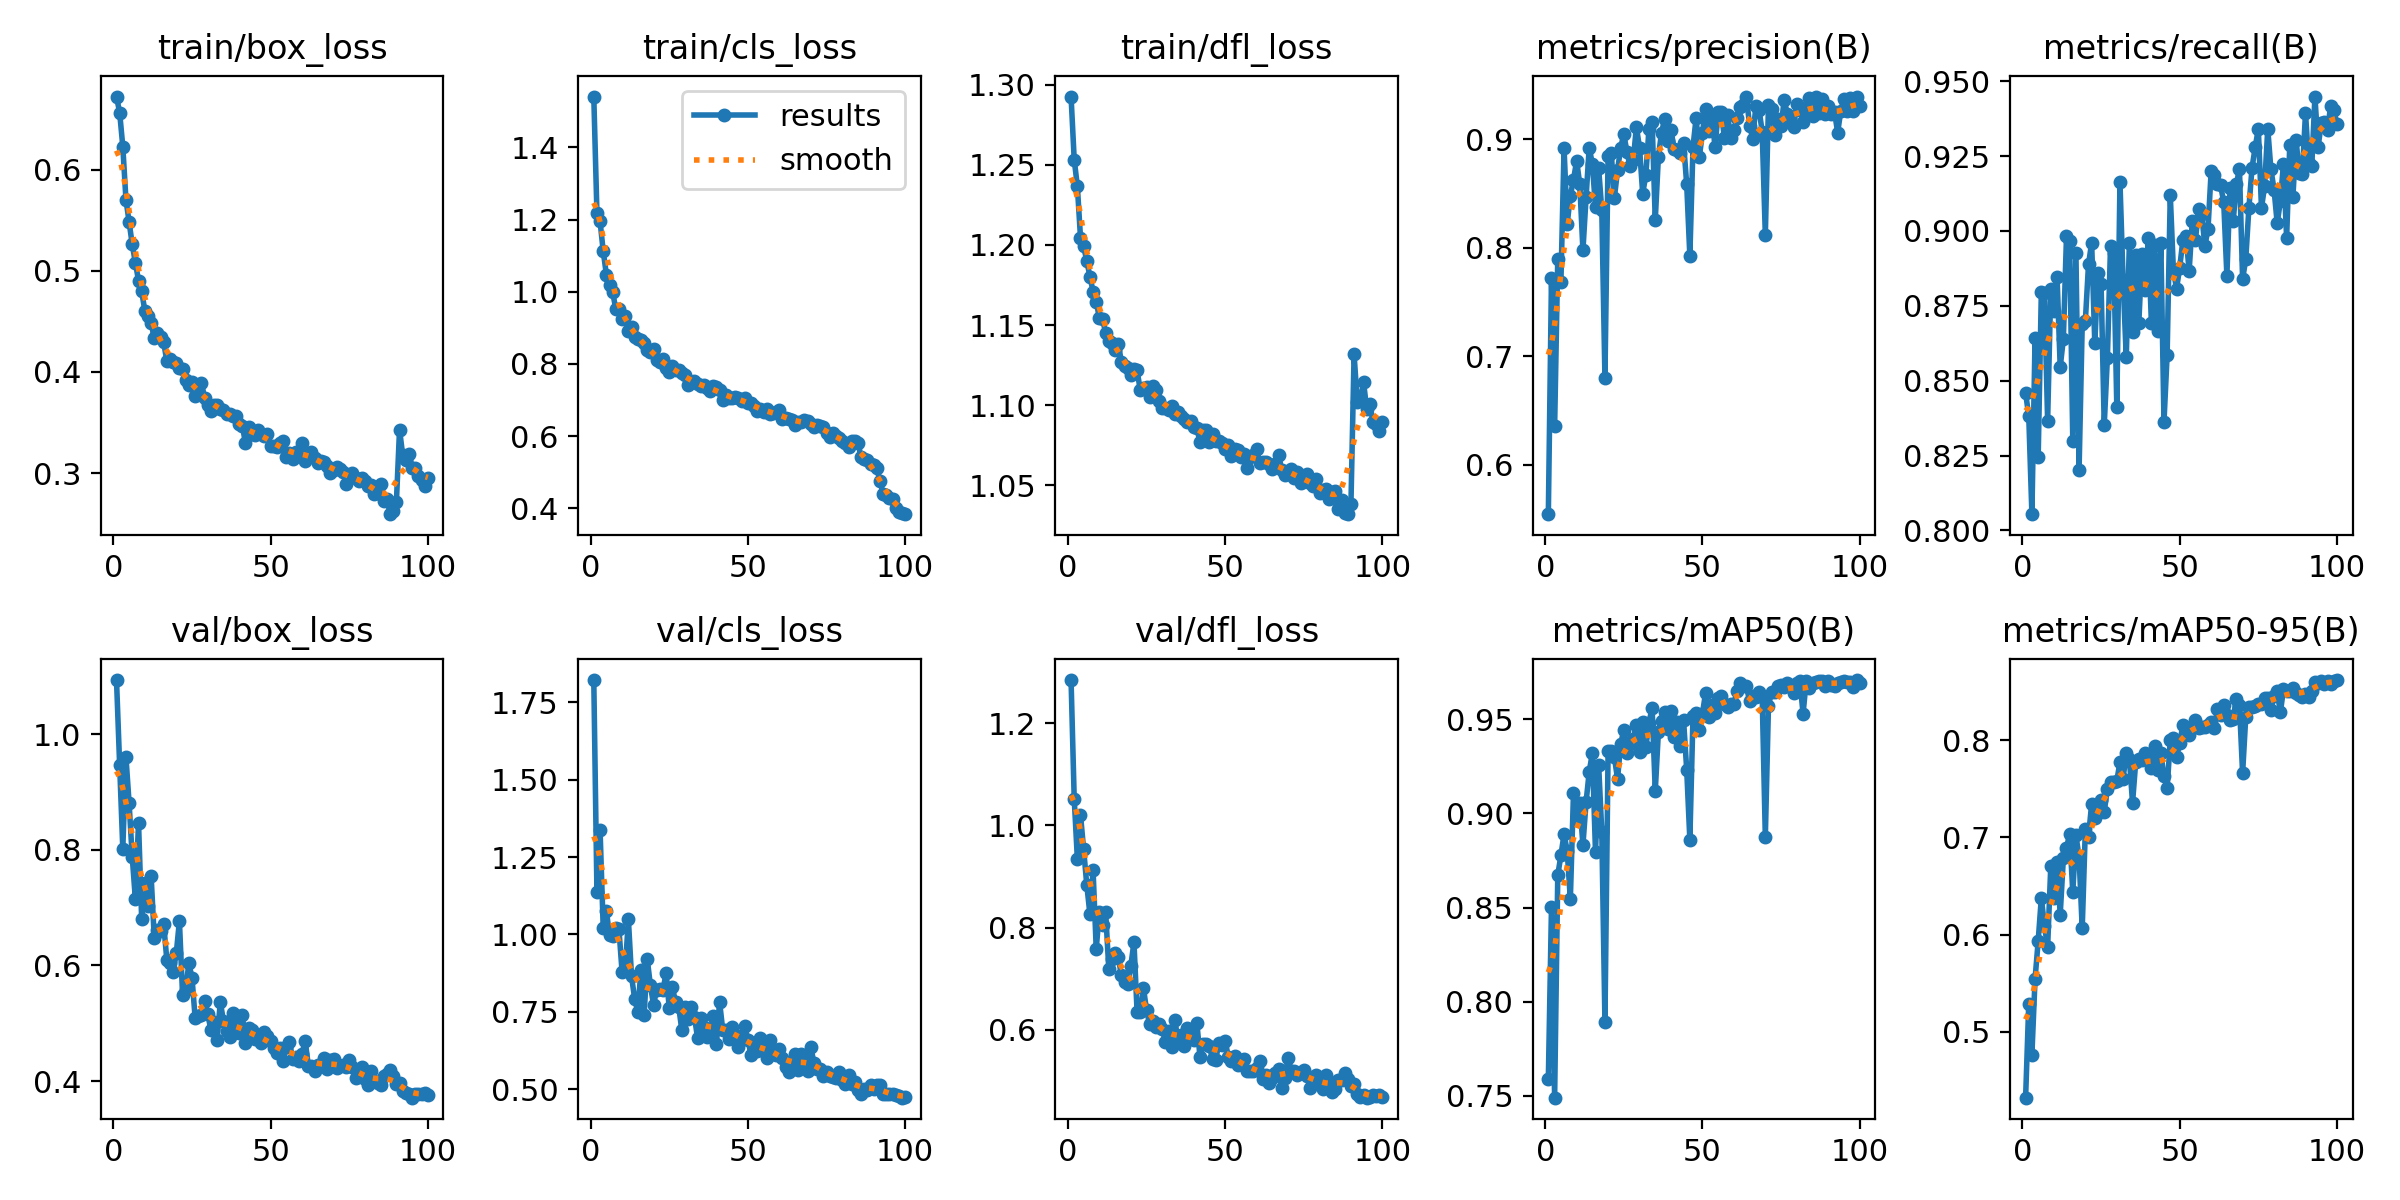

In [10]:
from IPython.display import Image, display

# Display the training performance graph
display(Image(filename='/content/drive/MyDrive/pomeyolo/results_y12s/results.png'))

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training log
df = pd.read_csv('/content/drive/MyDrive/pomeyolo/results_y12s/results.csv')

# Print column names to inspect
print(df.columns)

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


Ultralytics 8.3.213 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 341.8±82.7 MB/s, size: 859.2 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/1SX5sjRSb2KUnspAmKGge3WQwVqTJQ1wH/pome_yolo/labels/val.cache... 509 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 509/509 830.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 32/32 4.1it/s 7.7s
                   all        509        509       0.93      0.936      0.969      0.862
            Alternaria         86         86      0.954      0.964      0.978      0.869
           Anthracnose        118        118      0.919      0.932      0.976      0.862
      Bacterial_Blight         85         85      0.975      0.988      0.992      0.886
            Cercospora         72         72      0.929       0.91      0.963      0.853
               Healthy        148        148      0.873      0.88

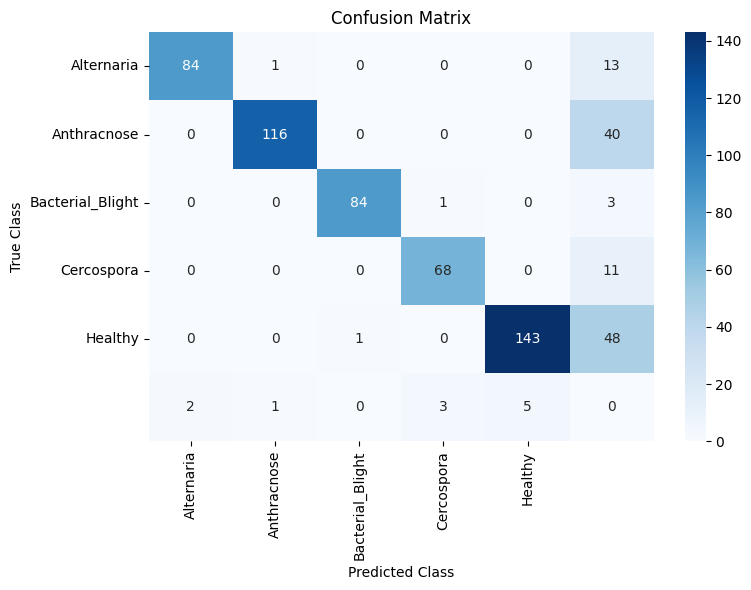

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Run validation and get results
results = model.val()

# Extract the confusion matrix
cm = results.confusion_matrix.matrix  # Shape: [num_classes, num_classes]

# Define your actual class names in correct order
class_names = ["Alternaria", "Anthracnose", "Bacterial_Blight", "Cercospora", "Healthy"]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


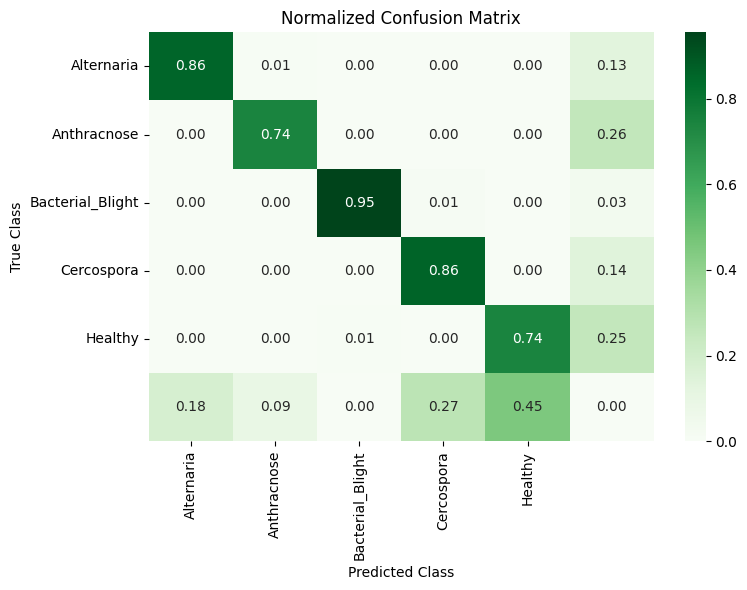

In [13]:
cm_normalized = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Normalized Confusion Matrix')
plt.tight_layout()
plt.show()


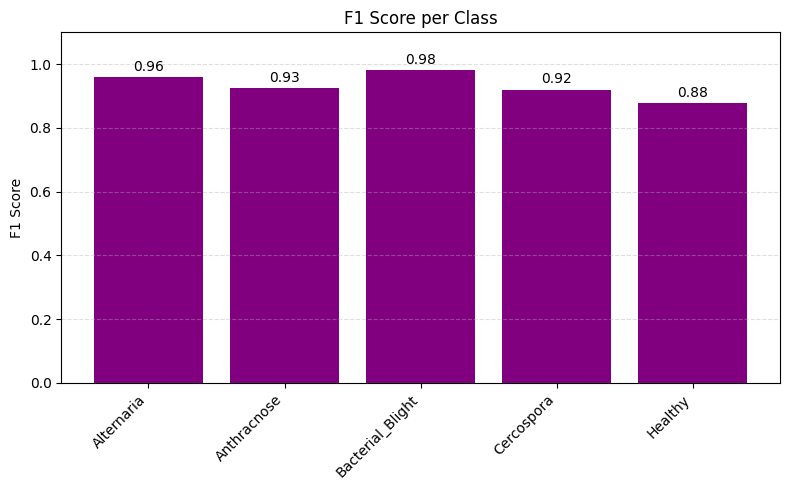

In [14]:
# Get class names in correct order
class_names = ["Alternaria", "Anthracnose", "Bacterial_Blight", "Cercospora", "Healthy"]

# Access precision and recall directly from the box attribute
per_class_precision = metrics.box.p
per_class_recall = metrics.box.r

# Compute F1 score safely
f1_scores = 2 * (np.array(per_class_precision) * np.array(per_class_recall)) / (np.array(per_class_precision) + np.array(per_class_recall) + 1e-6)

# Plot F1 score
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.bar(class_names, f1_scores, color='purple')
plt.ylabel('F1 Score')
plt.ylim(0, 1.1)
plt.title('F1 Score per Class')
plt.xticks(rotation=45, ha='right')  # Rotate for readability
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

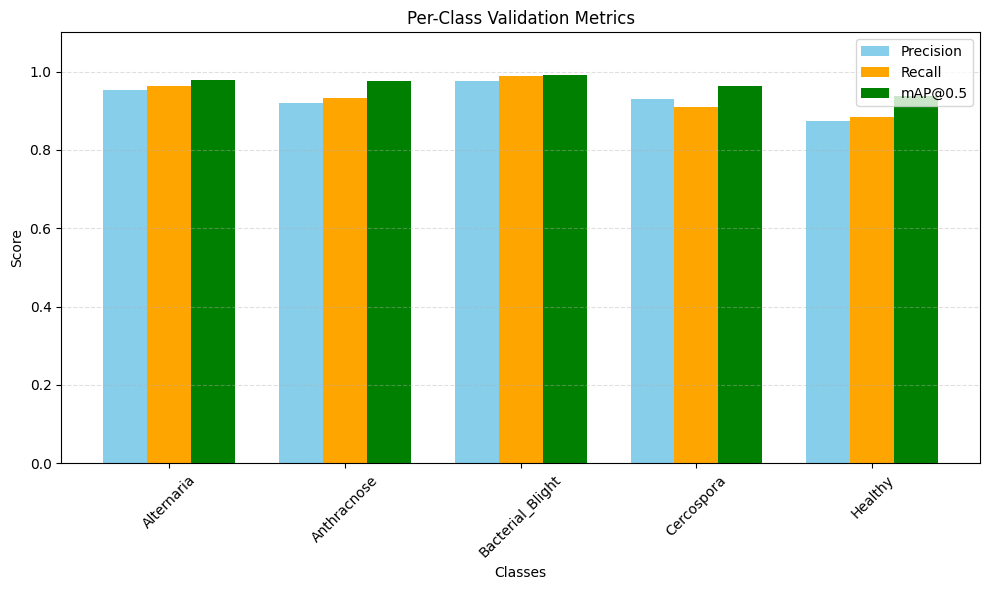

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Your correct class order
class_names = ["Alternaria", "Anthracnose", "Bacterial_Blight", "Cercospora", "Healthy"]

# Get metrics from results.box
metrics = results.box
per_class_precision = metrics.p
per_class_recall = metrics.r
per_class_map50 = metrics.ap50

# Ensure lengths match
assert len(class_names) == len(per_class_precision), "Class count mismatch"

# Plot
x = np.arange(len(class_names))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, per_class_precision, width, label='Precision', color='skyblue')
plt.bar(x, per_class_recall, width, label='Recall', color='orange')
plt.bar(x + width, per_class_map50, width, label='mAP@0.5', color='green')

plt.xlabel("Classes")
plt.ylabel("Score")
plt.title("Per-Class Validation Metrics")
plt.xticks(x, class_names, rotation=45)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


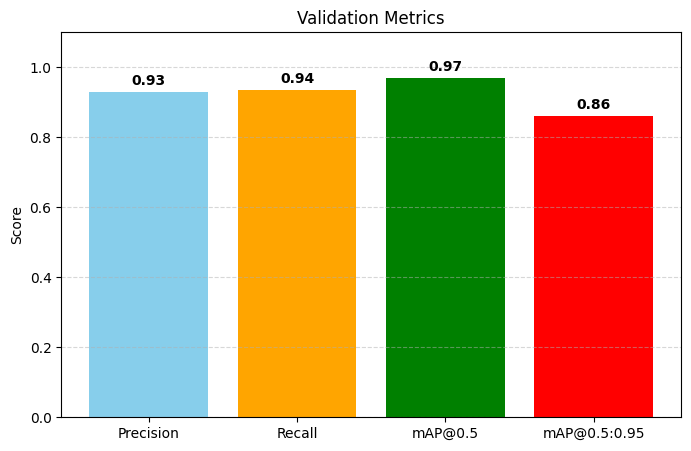

In [16]:
import matplotlib.pyplot as plt
import numpy as np

metrics = results.box

# Use np.mean() to convert lists to single values
precision = np.mean(metrics.p)       # list → float
recall = np.mean(metrics.r)          # list → float
map50 = metrics.map50                # already float
map5095 = metrics.map                # already float

# Bar chart
names = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
values = [precision, recall, map50, map5095]

plt.figure(figsize=(8, 5))
plt.bar(names, values, color=['skyblue', 'orange', 'green', 'red'])
plt.title("Validation Metrics")
plt.ylim(0, 1.1)
plt.ylabel("Score")

# Add value labels on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


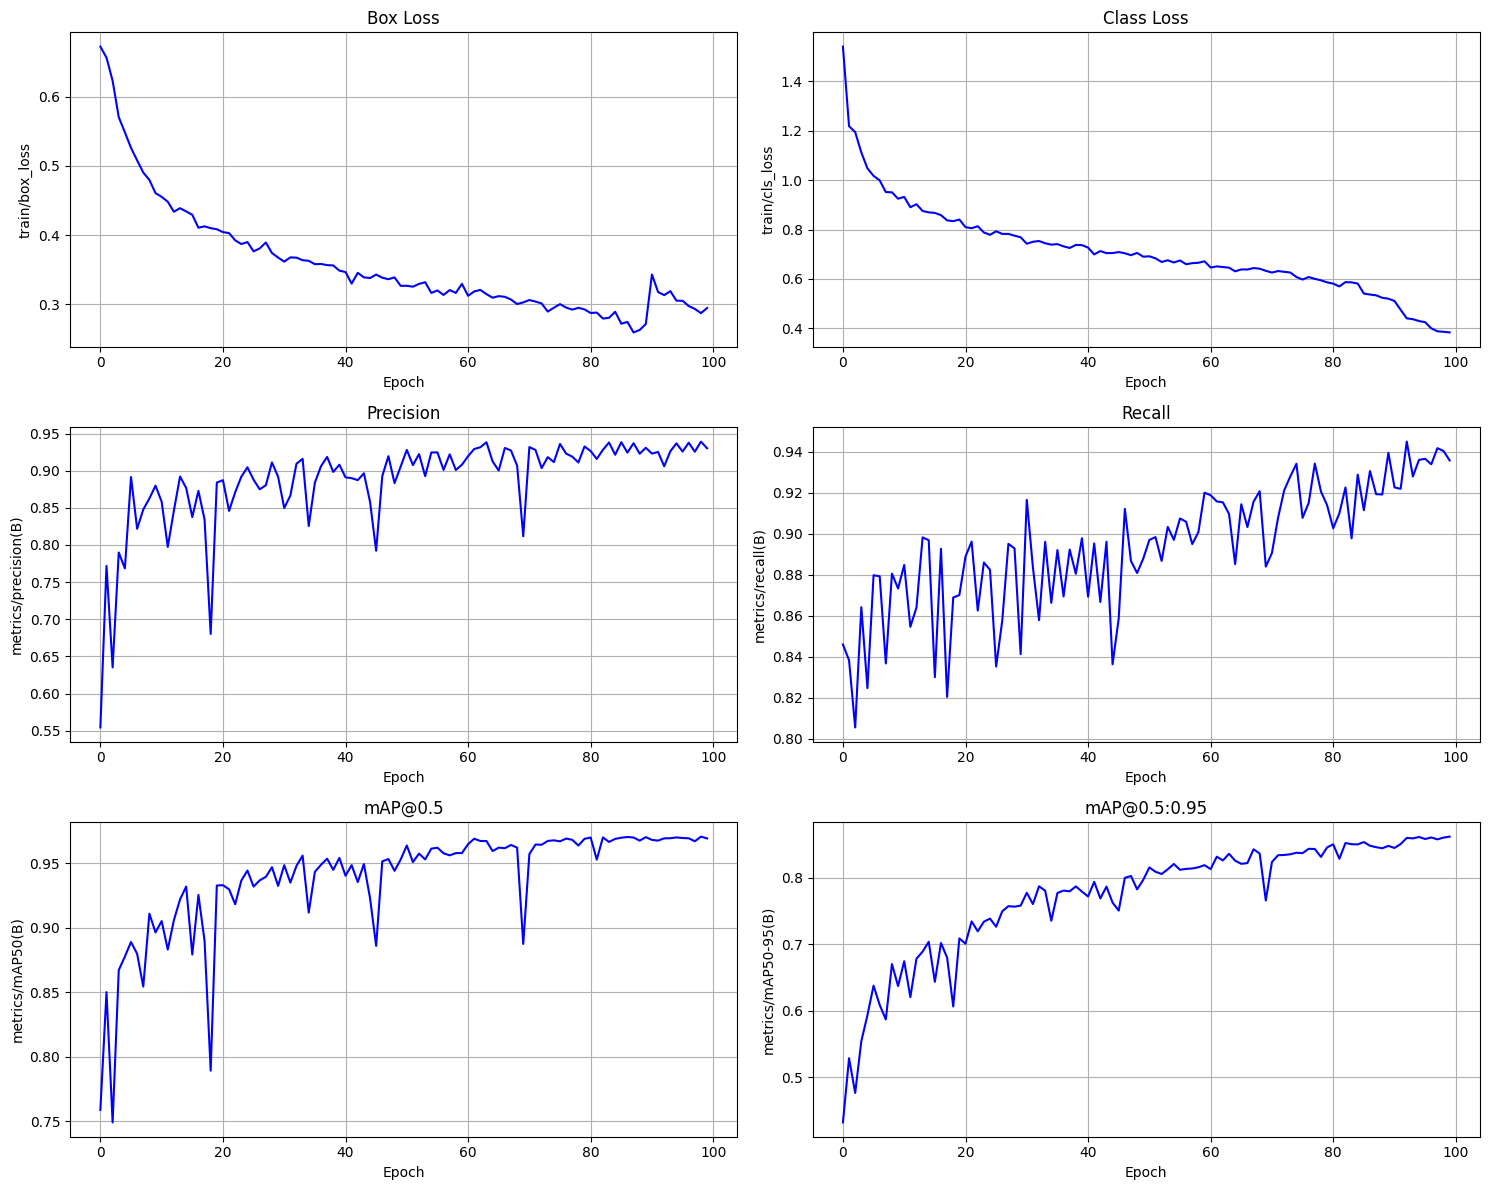

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Path to the results CSV file
csv_path = "/content/drive/MyDrive/pomeyolo/results_y12s/results.csv"

# Load the CSV
df = pd.read_csv(csv_path)

# Plot metrics
metrics = ['train/box_loss', 'train/cls_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
titles = ['Box Loss', 'Class Loss', 'Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']

plt.figure(figsize=(15, 12))
for i, metric in enumerate(metrics):
    plt.subplot(3, 2, i + 1)
    plt.plot(df[metric], label=metric, color='blue')
    plt.title(titles[i])
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

Copied image for class 0 (Alternaria) to /tmp/sample_per_class/Alternaria.jpg
Copied image for class 1 (Anthracnose) to /tmp/sample_per_class/Anthracnose.jpg
Copied image for class 4 (Healthy) to /tmp/sample_per_class/Healthy.jpg
Copied image for class 3 (Cercospora) to /tmp/sample_per_class/Cercospora.jpg
Copied image for class 2 (Bacterial_Blight) to /tmp/sample_per_class/Bacterial_Blight.jpg


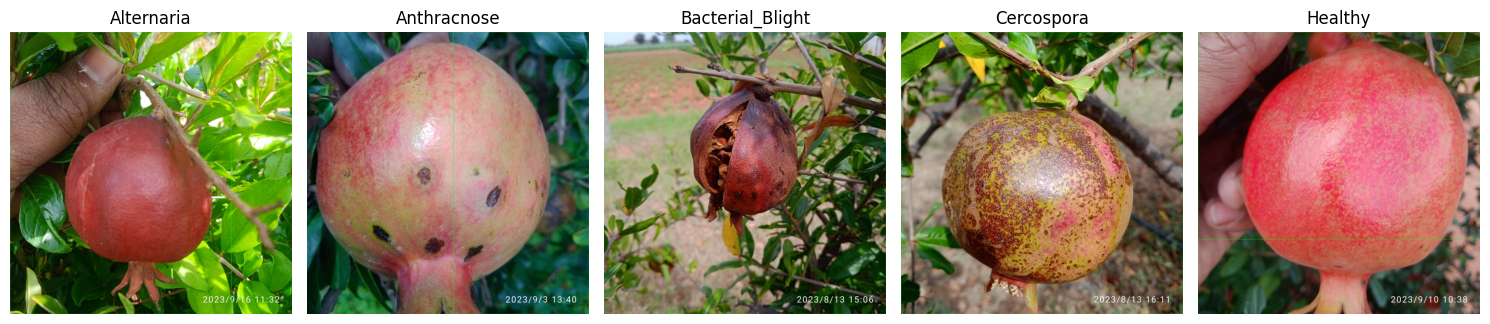

In [18]:
import os
import shutil
import matplotlib.pyplot as plt
import cv2

# Base paths
image_base = "/content/drive/MyDrive/pomeyolo/pome_yolo/images"
label_base = "/content/drive/MyDrive/pomeyolo/pome_yolo/labels"
# Use a temporary directory as a workaround for Google Drive permission issues
output_folder = "/tmp/sample_per_class"

# Actual class names (correct order)
classes = ["Alternaria", "Anthracnose", "Bacterial_Blight", "Cercospora", "Healthy"]

# Make output folder
os.makedirs(output_folder, exist_ok=True)

# Track seen classes and images
seen_classes = {}
image_paths = {}

# Loop through splits
for split in ['train', 'val', 'test']:
    label_dir = os.path.join(label_base, split)
    image_dir = os.path.join(image_base, split)

    # Check if label directory exists to avoid errors if data is missing
    if not os.path.exists(label_dir):
        print(f"Label directory not found: {label_dir}. Skipping split.")
        continue

    for label_file in os.listdir(label_dir):
        if not label_file.endswith(".txt"):
            continue

        label_path = os.path.join(label_dir, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()

        # Check if there are any labels in the file
        if not lines:
            continue

        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                try:
                    class_id = int(parts[0])
                    # Ensure class_id is within the bounds of the classes list
                    if class_id < 0 or class_id >= len(classes):
                        print(f"Warning: Skipping invalid class_id {class_id} in file {label_file}")
                        continue

                    if class_id not in seen_classes:
                        image_name = os.path.splitext(label_file)[0]
                        for ext in ['.jpg', '.jpeg', '.png']:
                            image_path = os.path.join(image_dir, image_name + ext)
                            if os.path.exists(image_path):
                                # Save to the temporary output folder
                                dest = os.path.join(output_folder, f"{classes[class_id]}.jpg")
                                shutil.copy(image_path, dest)
                                seen_classes[class_id] = classes[class_id]
                                # Store the temporary destination path and the original label path
                                image_paths[class_id] = (dest, label_path)
                                print(f"Copied image for class {class_id} ({classes[class_id]}) to {dest}")
                                break # Move to the next class after finding one image
                except ValueError:
                     print(f"Warning: Skipping line with invalid format in file {label_file}: {line.strip()}")
                     continue

        if len(seen_classes) == len(classes):
            break # Stop searching once we have one image for each class
    if len(seen_classes) == len(classes):
        break # Stop searching once we have one image for each class

# Display the images with bounding boxes
# Ensure we have found at least one image to display
if image_paths:
    plt.figure(figsize=(15, 5))
    # Sort by class_id to ensure consistent plotting order
    for idx, class_id in enumerate(sorted(image_paths.keys())):
        img_path, label_path = image_paths[class_id]
        # Check if the copied image exists before trying to read it
        if not os.path.exists(img_path):
             print(f"Error: Copied image not found at {img_path}")
             continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"Error: Could not read image at {img_path}")
            continue

        h, w = img.shape[:2]

        # Draw bounding boxes from the original label file
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    try:
                        cls = int(parts[0])
                        # Only draw bounding boxes for the selected class in this subplot
                        if cls == class_id:
                            xc, yc, bw, bh = map(float, parts[1:])
                            # Convert YOLO to pixel coords
                            x1 = int((xc - bw/2) * w)
                            y1 = int((yc - bh/2) * h)
                            x2 = int((xc + bw/2) * w)
                            y2 = int((yc + bh/2) * h)
                            # Use different color for bounding box if needed, or keep green
                            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                            # Put class name text, check if cls is valid index
                            if 0 <= cls < len(classes):
                                cv2.putText(img, classes[cls], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
                            else:
                                print(f"Warning: Invalid class_id {cls} found in label file {label_path}")
                    except ValueError:
                        print(f"Warning: Skipping line with invalid format in file {label_path}: {line.strip()}")


        # Convert to RGB for matplotlib
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(image_paths), idx + 1) # Adjust subplot count based on images found
        plt.imshow(img)
        plt.title(classes[class_id])
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images found for any class to display.")

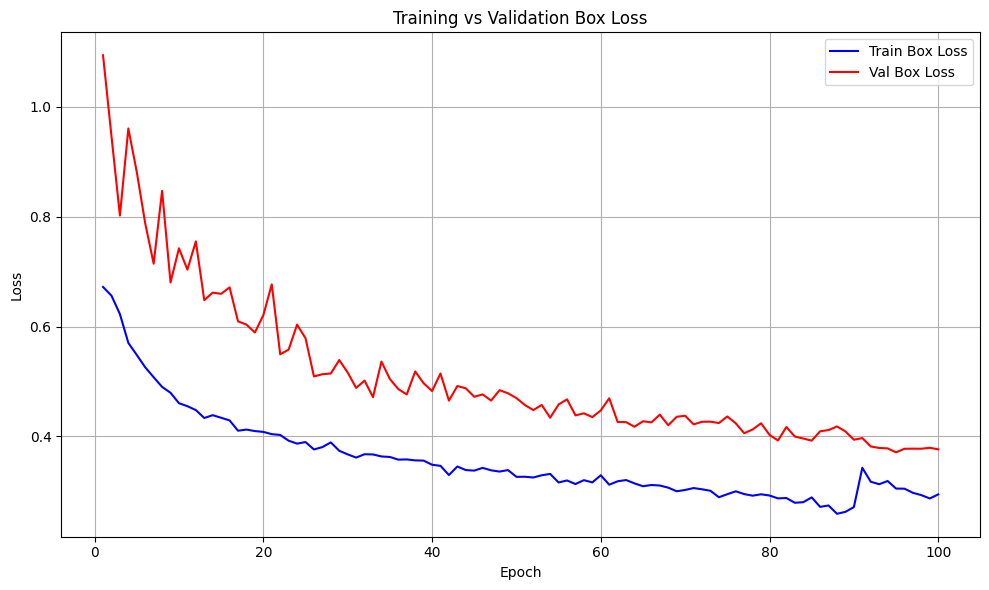

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results CSV
df = pd.read_csv('/content/drive/MyDrive/pomeyolo/results_y12s/results.csv')  # update path if needed

# Plot Box Loss
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', color='blue')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Box Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

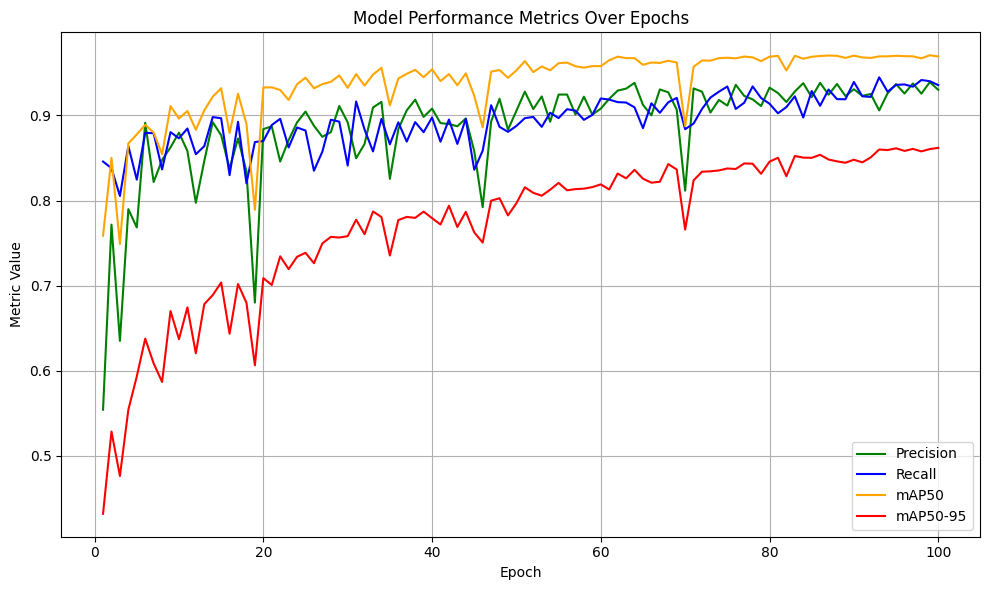

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
df = pd.read_csv('/content/drive/MyDrive/pomeyolo/results_y12s/results.csv')  # Update path if needed

# Plot
plt.figure(figsize=(10, 6))

plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision', color='green')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall', color='blue')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50', color='orange')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95', color='red')

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Model Performance Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()